In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

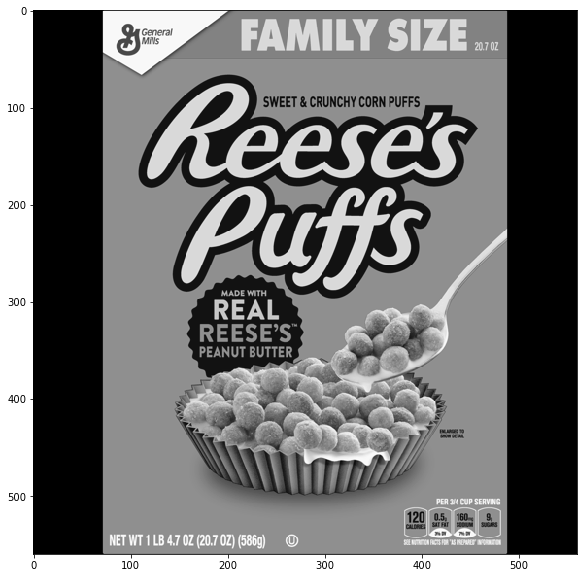

In [4]:
reeses = cv2.imread('reeses_puffs.png',0)
display(reeses)

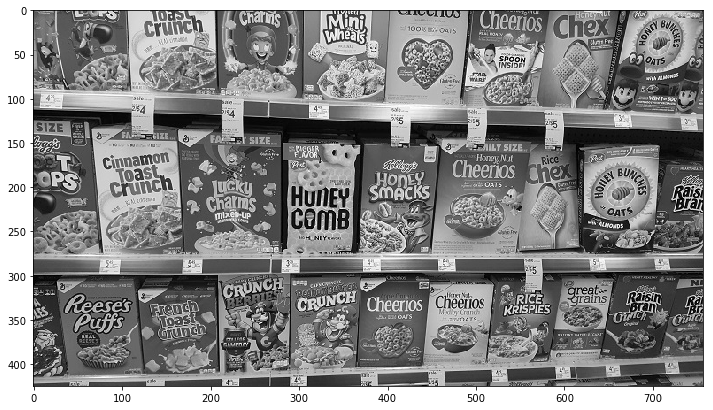

In [5]:
cereals = cv2.imread('many_cereals.jpg',0)
display(cereals)

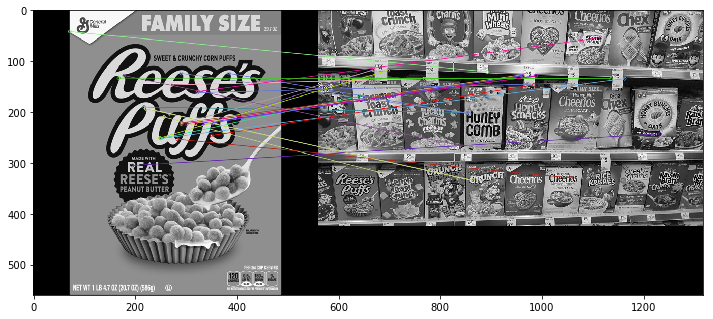

In [12]:
orb = cv2.ORB_create()

kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

matches = bf.match(des1,des2)

matches = sorted(matches,key=lambda x:x.distance)

reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

display(reeses_matches)

In [16]:
sift = cv2.xfeatures2d.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2,k=2)

good = []

# LESS DISTANCE == BETTER MATCH
# RATIO MATCH1 < 75% MATCH2
for match1,match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])


sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

display(sift_matches)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [24]:
sift = cv2.xfeatures2d.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# LESS DISTANCE == BETTER MATCH
# RATIO MATCH1 < 70% MATCH2
for match1,match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

display(flann_matches)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [25]:
sift = cv2.xfeatures2d.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

# LESS DISTANCE == BETTER MATCH
# RATIO MATCH1 < 70% MATCH2
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])
        matchesMask[i] = [1,0]

draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

display(flann_matches)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'